impose a graph with a chunk representation

In [1]:
# first, test generative model on one dimensional graphs
import sys
sys.path.append('../HCM')
from Chunking_Graph import *
from main import *
import seaborn as sns

In [2]:
# demonstrate the graph structure as the number of observation increases
import operator
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

plt.figure(figsize = (10,10))

def plot_chunk_graph(vertex_list, edges, location, ax=None):
    chunks = []
    for ck in vertex_list:
        chunks.append(list(np.ravel(tuple_to_arr(ck)).astype(int)))
    print('chunks ', chunks)
    print('edges ', edges)
    print('location ', location)
    #location[0] = [1,8]
    element_palette = {0:'#FFFFFF', 1:'#FFCAB1', 2:'#C1D7AE', 3:'#E885ec',4:'#85bdec',5:'#F7F726'}  # colorblind palette
    chunk_element_offset = {1: [0], 2: [-0.1, 0.1], 3: [-0.2, 0, 0.2], 4: [-0.3, -0.1, 0.1, 0.3],5:[-0.4, -0.2,0, 0.2, 0.4],6:[-0.6,-0.4, -0.2, 0, 0.2,0.4],7:[-0.6,-0.4, -0.2,0, 0.2, 0.4,0.6],8:[-0.8,-0.6,-0.4, -0.2,0,0.2, 0.4,0.6]}


    chunk_element_distance = 1.8
    if ax is None:
        f, ax = plt.subplots()

    chunks_by_length = defaultdict(list)
    for chunk in chunks:
        chunks_by_length[len(chunk)].append(chunk)
    max_width = max(len(v) for v in chunks_by_length.values())

    node_pos = {}
    for i in range(0,len(chunks)):
        chunk = chunks[i]
        chunk_id = chunks.index(chunk)
        chunk_len = len(chunks[chunk_id])
        n_on_level = len(chunks_by_length[chunk_len])
        id_on_level = chunks_by_length[chunk_len].index(chunk)
        xpos = location[i][0]
        ypos = location[i][1]
        node_pos[chunk_id] = (xpos, ypos)

    G = nx.MultiDiGraph()
    for node in range(len(chunks)):
        G.add_node(node, pos=node_pos[node])

    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=0)

    edge_color = ['k' if weight else 'grey' for weight in nx.get_edge_attributes(G,'weight').values()]

    nx.draw_networkx(G, node_pos,
                        node_color='grey',
                        node_size=0.0001,
                        #connectionstyle='arc3, rad = 0.1',
                        arrowsize=15,
                        width=3,
                        with_labels=False,
                        edge_color=edge_color,
                        alpha = 0.3,
                        ax=ax)

    for chunk_id, chunk in enumerate(chunks):

        for element_id, element in enumerate(chunk):
            ax.scatter([node_pos[chunk_id][0] + (chunk_element_offset[len(chunk)][element_id] * chunk_element_distance)],
                        [node_pos[chunk_id][1]],
                        c=element_palette[element],
                        edgecolors = 'lightgrey',
                        linewidth=3,
                        marker='s',
                        s=600
                        #zorder=5
                        )
    plt.axis("off")
    plt.show()

    return ax


<Figure size 720x720 with 0 Axes>

representation by the graph

chunks  [[0], [1], [2], [3], [4], [1, 2], [3, 1], [1, 2, 3, 1], [3, 1, 4]]
edges  [(1, 5), (2, 5), (1, 6), (3, 6), (5, 7), (6, 7), (6, 8), (4, 8)]
location  [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [3.0, 1], [4.0, 1], [3.5, 3], [4.5, 2]]


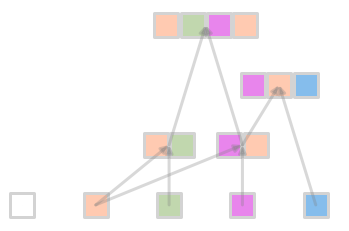

<AxesSubplot:>

In [3]:
cg = impose_representation()
plot_chunk_graph(cg.vertex_list,cg.edge_list, cg.vertex_location)

chunks  [[0], [1], [2], [3], [4], [1, 2], [3, 1], [1, 2, 3, 1], [3, 1, 4], [1, 2, 3, 1, 3, 1, 4]]
edges  [(1, 5), (2, 5), (1, 6), (3, 6), (5, 7), (6, 7), (6, 8), (4, 8), (8, 9), (7, 9)]
location  [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [3.0, 1], [4.0, 1], [3.5, 3], [4.5, 2], [3.0, 4]]


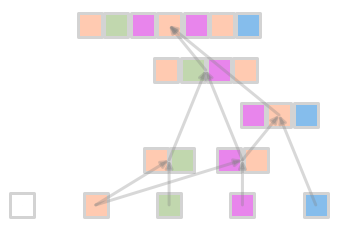

<AxesSubplot:>

In [4]:
fac_env = generate_facilitative_env()
plot_chunk_graph(fac_env.vertex_list,fac_env.edge_list, fac_env.vertex_location)

# Interfering Environment

chunks  [[0], [1], [2], [3], [4], [5], [5, 4], [5, 3], [2, 4], [2, 4, 5, 4]]
edges  [(4, 6), (5, 6), (5, 7), (3, 7), (2, 8), (4, 8), (8, 9), (6, 9)]
location  [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [5.0, 1], [4.0, 1], [3.0, 1], [4.5, 2]]


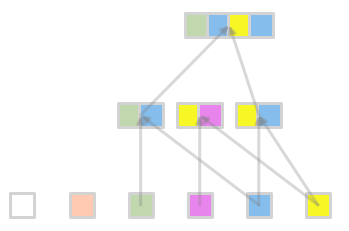

<AxesSubplot:>

In [5]:
int_env = generate_interfering_env()
plot_chunk_graph(int_env.vertex_list,int_env.edge_list, int_env.vertex_location)

naive learner gets to know trained representation starting from the 

[Text(0.5, 0, 'Type')]

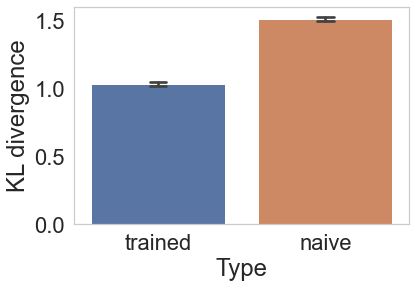

In [20]:
df = pd.read_csv('../HCM/TransferExperiment')
sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.barplot(x="type", y="kl", data=df[(df['env'] == 'transfer')& (df['N']<500)],capsize=.1,ci=68)
ax.set(ylabel='KL divergence')
ax.set(xlabel='Type')

[Text(0.5, 0, 'Type')]

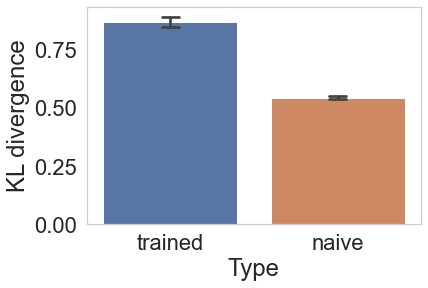

In [21]:
sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.barplot(x="type", y="kl", data=df[(df['env'] == 'interfere')& (df['N']<=500)],capsize=.1,ci=68)
ax.set(ylabel='KL divergence')
ax.set(xlabel='Type')